In [1]:
%load_ext autoreload

%autoreload 2

import sys
sys.path.append('material')
from auxiliary import *

# Housekeeping

* Please note the updated due date of the student projects on the course website.

# Potential outcome model

Given what we know from the introduction about the potential outcome model, we will initialily prepare the Lalonde Dataset to fit the framework and use it as a running example going forward.

In [2]:
df = pd.read_pickle('../../datasets/processed/angrist_pischke/nswre74.pkl')
df.head()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
0,1,37,11,1,0,1,1,0.0,0.0,9930.045898,1369.0
1,1,22,9,0,1,0,1,0.0,0.0,3595.894043,484.0
2,1,30,12,1,0,0,0,0.0,0.0,24909.449219,900.0
3,1,27,11,1,0,0,1,0.0,0.0,7506.145996,729.0
4,1,33,8,1,0,0,1,0.0,0.0,289.789886,1089.0


Let's put this in the same form of the basic model.

In [3]:
df = df[['treat', 're78']].sample(frac=1)

df['Y'] = df['re78']
df['Y_0'] = df.loc[df['treat'] == 0, 're78']
df['Y_1'] = df.loc[df['treat'] == 1, 're78']

df['D'] = 0
df.loc[df['treat'] == 1, 'D'] = 1

## Individual-specific effect of treatment

It would be great if we could get our hands on the individual-specific effect of treatment.

\begin{align*}
\delta_i = y_1^i - y_1^i
\end{align*}

* Why do individuals have potentially different effects of treatment?

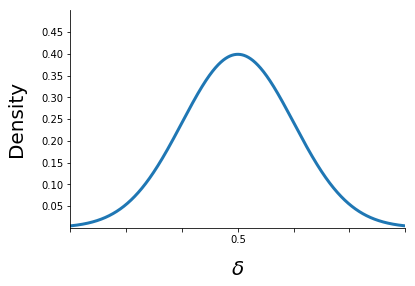

In [4]:
plot_individual_specific_effects()

* There might be considerable heterogeneity in the benefits of treatment among the population. And summarizing the distribution of benefits with a single number, for example $E[\delta]$, might result in a loss of information.

**Examples**

* medical treatment
* ..

Give our definitions of $(Y^1, Y^0, D)$ and their individual realizations $(y^1_i, y^0_i, d_i)$ we can now define the observed outcome $Y$ in terms of them.

\begin{align*}
Y = \begin{cases}
Y^1 & \quad\text{if}\quad D = 1 \\
Y^0 & \quad\text{if}\quad D = 0
\end{cases}
\end{align*}

or more compactly in switching-regime notation

\begin{align*}
Y = D Y^1 + (1 - D) Y^0.
\end{align*}

This leads Holland (1986) to describe the fundamental problem of causal inference:

<img src="material/fundamental_problem.png" height="500" width=500 />

$\rightarrow$ as only the diagonal of the table is observable we cannot simply compute $\delta_i$ by taking the difference in potential outcomes $(y^1_i, y^0_i)$.

In [5]:
df.head()

,treat,re78,Y,Y_0,Y_1,D
134,1,4032.708008,4032.708008,NaN,4032.708008,1
190,0,9227.051758,9227.051758,9227.051758,NaN,0
365,0,0.000000,0.000000,0.000000,NaN,0
260,0,13613.349609,13613.349609,13613.349609,NaN,0
253,0,11197.339844,11197.339844,11197.339844,NaN,0


## Population-level parameters

It looks like we need to give our our hope of obtaining the individual-specific effect of treatment. But what can we still hope for?

$\rightarrow$ population-level parameters

* What are common examples?

* What are the policy questions they address?

* What is their relationship to each other?

\begin{align*}
\begin{array}{lll}
E[Y^1 - Y^0] & \qquad ATE & \qquad\text{average effect of treatment} \\
E[Y^1 - Y^0 \mid D = 1] & \qquad ATT & \qquad\text{average effect on treated} \\
E[Y^1 - Y^0 \mid D = 0] & \qquad ATC & \qquad\text{average effect on untreated}
\end{array}
\end{align*}

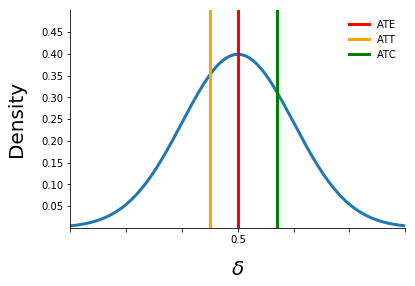

In [6]:
plot_individual_specific_effects(with_parameters=[0, 0.7, -0.5])

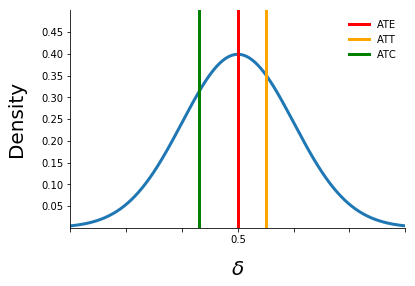

In [7]:
plot_individual_specific_effects(with_parameters=[0, -0.7, 0.5])

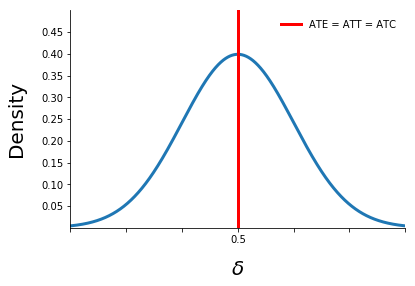

In [8]:
plot_individual_specific_effects(with_parameters=[0, 0, 0])

The potential outcome model is gets its empirical tractability when combined with the **Stable Unit Treatment Value Assumption (SUTVA)** of which there exist many formulations. We will go with the one from Imbens and Rubin (2015):

> The potential outcomes for any unit do not vary with the treatments assigned to other units, and, for each unit there are no different forms or versions of each treatment level, which lead to different potential outcomes.

* When do we need to expect this is vioated?


<img src="material/stable_unit_treatment.png" height="500" width=500 />

* randomized experiment

\begin{align*}
(Y^0, Y^1)  \perp \!\!\! \perp D
\end{align*}

* observational study

> A *observational study* is an empirical investigation of treatments, policies, or exposures and the effects they cause, but it differs from an experiment in that the investigator cannot control the assingment of treatments to subjects. (Rosenbaum (2002))

\begin{align*}
\hat{\delta}_{NAIVE} = E_N[y_i\mid d_i = 1] - E_N[y_i\mid d_i = 0]
\end{align*}

where 

\begin{align*}
E_N[y_i\mid d_i = 1] \xrightarrow{p} E[Y^1\mid D = 1] \neq E[Y^1]\\
E_N[y_i\mid d_i = 0] \xrightarrow{p} E[Y^0\mid D = 0] \neq E[Y^0]
\end{align*}

\begin{align*}
E[\delta] & = \{\pi E[Y^1\mid D = 1] + (1 - \pi)E[Y^1\mid D = 0]\} \\
          & - \{\pi E[Y^0\mid D = 1] + (1 - \pi)E[Y^0\mid D = 0]\}
\end{align*}


* Which components can be easily computed from data?

\begin{align*}
E[Y^1 \mid D = 1] - E[Y^0 \mid D = 0] & = E[\delta] + \{E[Y^0\mid D= 1] - E[Y^0\mid D= 0]\} \\
                                      & + (1 - \pi) \{E[\delta \mid D = 1] -E[\delta \mid D = 0]\}
\end{align*}

* baseline bias
* differential treatment effect bias

<img src="material/bias_example.png" height="500" width=500 />

What assumptions suffice to estimate the ATE with the navie estimator?

* assumptions about potential outcomes for subsets of the population defined by treatment status
* assumptions about the treatment selection / assignment process 

Consider the following two assumptions:

\begin{align*}
E[Y^1\mid D = 1] = E[Y^1\mid D = 0] \\
E[Y^0\mid D = 1] = E[Y^0\mid D = 0] \\
\end{align*}

and recall our naive estimate 


\begin{align*}
\hat{\delta}_{NAIVE} & = E_N[y_i\mid d_i = 1] - E_N[y_i\mid d_i = 0] \\
                     & \xrightarrow{p} E[Y^1\mid D = 1] - E[Y^0\mid D = 0] 
\end{align*}

* What happeens if the two assumptions or at least one is satisfied?


### Missing data and imputation

This is an adopted example from Imbens & Rubin (2015).

In [9]:
df.head()

,treat,re78,Y,Y_0,Y_1,D
134,1,4032.708008,4032.708008,NaN,4032.708008,1
190,0,9227.051758,9227.051758,9227.051758,NaN,0
365,0,0.000000,0.000000,0.000000,NaN,0
260,0,13613.349609,13613.349609,13613.349609,NaN,0
253,0,11197.339844,11197.339844,11197.339844,NaN,0


We can impute the missing values simply by their average counterpart.

In [10]:
df.loc[df['D'] == 0, 'Y_1'] = df['Y_1'].mean()
df.loc[df['D'] == 1, 'Y_0'] = df['Y_0'].mean()
print('Our estimated treatment effect is {:10.2f}'.format((df['Y_1'] - df['Y_0']).mean()))

Our estimated treatment effect is    1794.34


However, this does not really account for any uncertainty in our estimate. Can we do better?

In [11]:
status_counts = df['D'].value_counts().to_dict()

stats = list()
for _ in range(100):
    y_1_sampled = df['Y_1'].dropna().sample(n=status_counts[0], replace=True).values
    y_0_sampled = df['Y_0'].dropna().sample(n=status_counts[1], replace=True).values

    df_boot = df.copy()

    df_boot.loc[df_boot['D'] == 1, 'Y_0'] = y_0_sampled
    df_boot.loc[df_boot['D'] == 0, 'Y_1'] = y_1_sampled
    
    stat = (df_boot['Y_1'] - df_boot['Y_0']).mean()
    stats.append(stat)
print('Our estimated treatment effect is {:10.2f}'.format(np.mean(stats)))

Our estimated treatment effect is    1745.68


How does the full distribution of estimates look like?

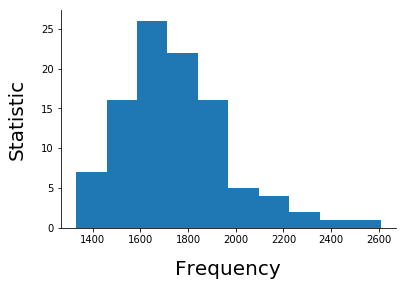

In [12]:
fig, ax = plt.subplots(1, 1)
ax.hist(stats)
ax.set_ylabel('Statistic')
ax.set_xlabel('Frequency');

Still some limitations remains. For example, we do sample from the empirical distribution of the observed outcomes and the actual distribution. Phrased differently, we treat the distribution of potential outcomes as knows and abstract from any uncertainty in our knowledge about it.

## Extensions of the binary potential outcome model

* over-time potential outcomes and causal effects
    * a single unit over time (time series)
    * many units over time (panel data)
    
* many-valued treatments

### Over-time potential outcomes

We explore the case of a single unit over time.

**Ingredients** 

* discrete time periods, $t\in\{1, ..., T\}$
* sequence of observed values, $\{y_1, y_2, ..., y_T\}$

Setting up the potential outcome model to explore the basic features of before-and-after designs for a single unit of analsysis.

* before the treatment is introduced (for $t < t^*$):

\begin{align*}
D_t & = 0 \\
Y_t & = Y^0_t\\
\end{align*}

* while the treatment is in place (from $t^*$ through $t^* + k$):

\begin{align*}
D_t & = 1 \\
Y_t & = Y^1_t\\
Y^0_t & \text{exists but is counterfactual}
\end{align*}

* after the treatment ends (for time periods $t > (t^* + k)$):
\begin{align*}
D_t & = 0 \\
Y_t & = Y^1_t\\
Y^1_t & \text{exists but is counterfactual}
\end{align*}

The following is an adapted example from our core textbook. 

In [13]:
import wbdata    # easy access to World Bank data
 
# source: https://data.worldbank.org/indicator/sp.dyn.cbrt.in
indicators = {'SP.DYN.CBRT.IN':'Birth rate'}
df = wbdata.get_dataframe(indicators, country=["JP"], convert_date=False)

df.sort_index(inplace=True)       # sort by year
df.index = df.index.astype(int)   # format index to integer type
df.head()

,Birth rate
date,
1960,17.3
1961,17.0
1962,17.1
1963,17.4
1964,17.8


Let's get to work.

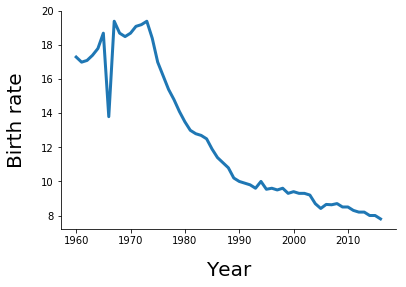

In [14]:
fig, ax = plt.subplots(1, 1)
ax.plot(df['Birth rate'].index, df['Birth rate'])
ax.set_ylabel('Birth rate')
ax.set_xlabel('Year');

In [15]:
df.loc[slice(1960, 1970), 'Birth rate']

date
1960    17.3
1961    17.0
1962    17.1
1963    17.4
1964    17.8
1965    18.7
1966    13.8
1967    19.4
1968    18.7
1969    18.5
1970    18.7
Name: Birth rate, dtype: float64

In [16]:
y_0 = df.loc[[1963, 1969], 'Birth rate'].mean()
y_1 = df.loc[1966, 'Birth rate']
print(' A reasonable treatment effect is {:10.5f}'.format(y_1 - y_0))

 A reasonable treatment effect is   -4.15000
